In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc


In [21]:
#Reading and Preprocessing

df = pd.read_csv("spam.csv", encoding='latin1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df['label'] = df['label'].map({'spam': 1, 'ham': 0})



In [25]:
#EDA
print(df.columns)
print(df.head())
print(df.info())



Index(['label', 'message'], dtype='object')
   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   int64 
 1   message  5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB
None


In [27]:
#Tokenizing using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X = vectorizer.fit_transform(df['message'])  
y = df['label']                             


In [29]:
#Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
#using Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [33]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.69      0.80       150

    accuracy                           0.96      1115
   macro avg       0.96      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115

[[962   3]
 [ 47 103]]


In [35]:
#using Navis Bayes
model1 = MultinomialNB()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.87      0.93       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115

[[965   0]
 [ 20 130]]


In [37]:
#using SVM
model2 = LinearSVC()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

[[961   4]
 [ 20 130]]


C:\Users\elgin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


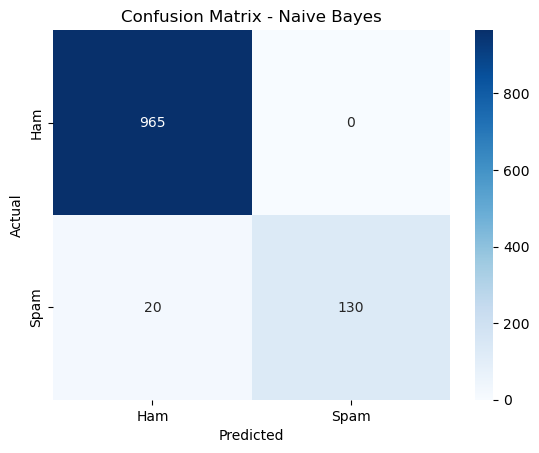

In [39]:
cm = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


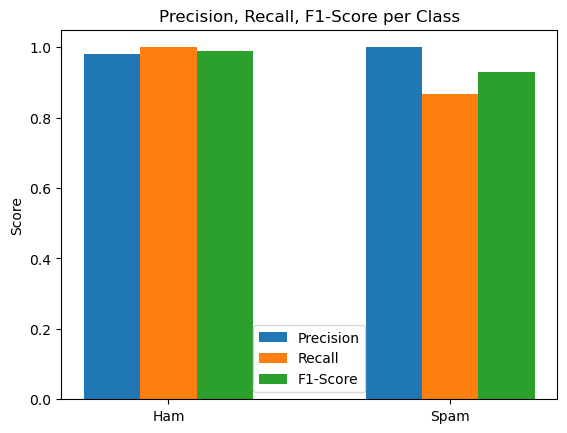

In [41]:
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred1)

labels = ['Ham', 'Spam']
x = range(len(labels))

plt.bar(x, precision, width=0.2, label='Precision', align='center')
plt.bar([i + 0.2 for i in x], recall, width=0.2, label='Recall', align='center')
plt.bar([i + 0.4 for i in x], f1, width=0.2, label='F1-Score', align='center')

plt.xticks([i + 0.2 for i in x], labels)
plt.ylabel('Score')
plt.title('Precision, Recall, F1-Score per Class')
plt.legend()
plt.show()


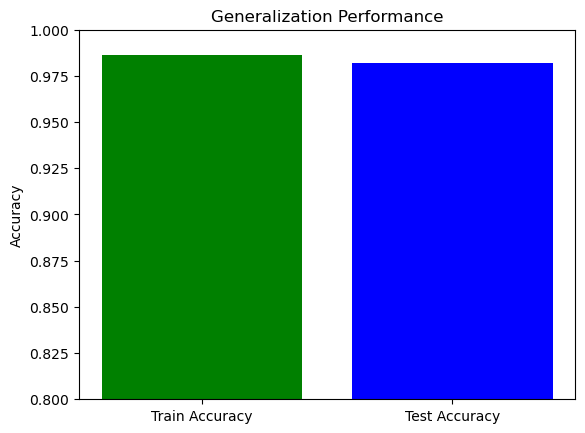

In [43]:
train_acc = model1.score(X_train, y_train)
test_acc = model1.score(X_test, y_test)

plt.bar(['Train Accuracy', 'Test Accuracy'], [train_acc, test_acc], color=['green', 'blue'])
plt.ylim(0.8, 1.0)
plt.title('Generalization Performance')
plt.ylabel('Accuracy')
plt.show()


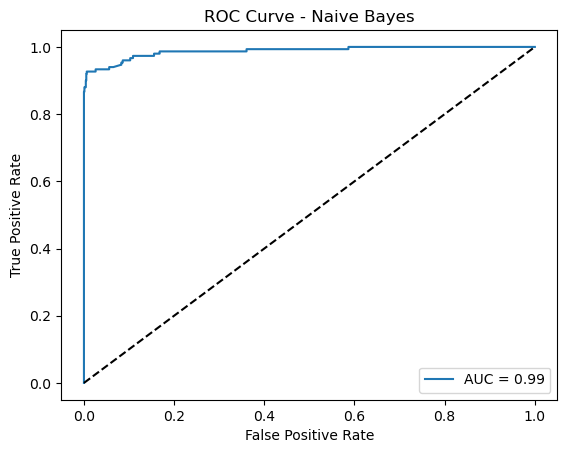

In [45]:
y_prob = model1.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend()
plt.show()


In [49]:
#checking for generalization with new values
new_message = "Learning new technologies requires patience, consistent practice, and curiosity. By dedicating time daily to study and experimentation, anyone can steadily improve their skills. Mistakes should be seen as opportunities for growth rather than setbacks. Collaboration with peers also strengthens understanding, since teaching others clarifies one’s own knowledge. Progress may feel slow, but persistence ensures meaningful long-term success."
def clean_text(text):
    import re
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    return text
msg_clean = clean_text(new_message)
msg_vector = vectorizer.transform([msg_clean])
prediction = model1.predict(msg_vector)[0]
print("Spam" if prediction == 1 else "Ham")



Ham
